In [1]:
# https://blog.csdn.net/QimaoRyan/article/details/72861387
# https://www.itcodemonkey.com/article/12348.html
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymysql
import pymysql.cursors
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pandas import Series, DataFrame

In [2]:
def read_from_csv(filename : str):
    meta_price_data = pd.read_csv(filename)
    return meta_price_data

def price_per_night(x, y):
    return x / y

# 去除退款、房间大于1000美元的房价
def data_preprocess_range(price_data, minnum: int, maxnum: int):
#     print(len(price_data))
    price_data = price_data[(1<=price_data['RM_NIGHT_CNT']) & (price_data['RM_CNT']==1) & (minnum<price_data['BASE_PRICE_AMT_USD']) & (price_data['BASE_PRICE_AMT_USD']<maxnum)]
#     print(len(price_data))
    price_data['BASE_PRICE_AMT_USD'] = price_data.apply(lambda row: price_per_night(row['BASE_PRICE_AMT_USD'], row['RM_NIGHT_CNT']), axis=1)
    return price_data['BASE_PRICE_AMT_USD']

# 对价格进行取对数计算
def data_preprocess_log(price: Series):
    return Series(map(lambda x: np.log2(x+1), price))

In [4]:
# 4. scipy.stats.normaltest
def scipy_stats_normaltest(price_data):
    k2, p = stats.normaltest(price_data)
    alpha = 1e-3
    print(p)
    if p < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [5]:
# 3. Anderson-Darling test
def scipy_stats_anderson(price_data):
    stats.anderson (price_data)

In [6]:
# 2. scipy.stats.kstest
# rvs - 待检验数据，可以是字符串、数组；
# cdf - 需要设置的检验，这里设置为 norm，也就是正态性检验；
# alternative - 设置单双尾检验，默认为 two-sided
def scipy_stats_kstest(price_data):
    w , p_value = stats.kstest (rvs = price_data, cdf = 'norm', args = (), N = 20, alternative ='two-sided', mode ='approx')
    print(w)
    print(p_value)

In [7]:
def scipy_stats_shapiro(price_data):
    w,p_value = stats.shapiro(price_data)
    print(w)
    print(p_value)

In [3]:
if __name__=="__main__":
    minnum, maxnum = 0, 1000
    meta_price_data = read_from_csv("trans_fact_201901.csv")
    price_data = data_preprocess_range(meta_price_data, minnum, maxnum)
    price_data = data_preprocess_log(price_data)

/Users/hiCore/miniconda3/envs/python3.7.3_dev/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


NameError: name 'scipy_stats_normaltest' is not defined

In [11]:
price_data = Series(filter(lambda x: 10>x>3, price_data))

In [12]:
print(price_data)

0           6.430620
1           7.105909
2           7.495557
3           6.048868
4           6.791423
5           6.387170
6           7.098960
7           6.754888
8           5.714015
9           9.228819
10          6.721221
11          6.400794
12          6.257388
13          7.887312
14          6.009437
15          6.963936
16          6.020125
17          6.122457
18          6.496548
19          6.507636
20          6.637610
21          6.563768
22          7.714246
23          6.767560
24          7.814422
25          6.854893
26          7.285402
27          5.872829
28          6.046161
29          7.238405
              ...   
15670339    7.845490
15670340    6.321928
15670341    5.615263
15670342    8.340904
15670343    6.151023
15670344    7.228819
15670345    6.042789
15670346    5.496290
15670347    6.480557
15670348    4.417103
15670349    8.377167
15670350    6.828327
15670351    6.906891
15670352    6.135453
15670353    6.190722
15670354    6.862870
15670355    5

(array([0.00169982, 0.00344269, 0.00767549, 0.01468453, 0.02475322,
        0.04406861, 0.08609355, 0.1855032 , 0.32239175, 0.43749146,
        0.53405946, 0.47960653, 0.33336594, 0.20989187, 0.11037285,
        0.04944433, 0.01812063, 0.00535172, 0.00187092, 0.00077013]),
 array([3.00001803, 3.34837014, 3.69672224, 4.04507434, 4.39342644,
        4.74177854, 5.09013065, 5.43848275, 5.78683485, 6.13518695,
        6.48353905, 6.83189116, 7.18024326, 7.52859536, 7.87694746,
        8.22529956, 8.57365166, 8.92200377, 9.27035587, 9.61870797,
        9.96706007]),
 <a list of 20 Patch objects>)

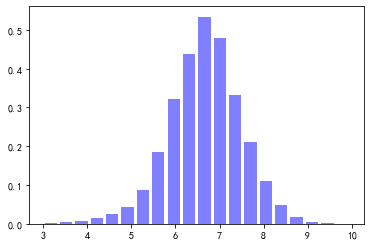

In [14]:
plt.hist(price_data, bins=20, color = 'blue',alpha=0.5,rwidth= 0.8, density=True)

In [13]:
scipy_stats_normaltest(price_data)

0.0
The null hypothesis can be rejected


In [7]:

mean = price_data.mean()
# 标准差
std = price_data.std()

# x的范围为 (0-3000，以1为单位,需x根据范围调试
x = np.arange(3, 10, 1)

# x数对应的概率密度
# y = normfun(x, mean, std)
y = stats.norm.pdf(x, mean, std)

In [10]:
scipy_stats_normaltest(price_data)

0.0
The null hypothesis can be rejected


In [8]:
print(y)

[2.73617599e-05 2.74594525e-03 6.41910929e-02 3.49536648e-01
 4.43348981e-01 1.30988680e-01 9.01481594e-03]
